(1) Calculate daily return (return = log(today close/previous close)) for each of 10 stocks 

- Download candles data for 10 chosen stocks from S&P500 from 2020/6/1 to 2020/12/31

In [265]:
import yfinance as yf
symbols = [
    'AAPL', 'AMZN', 'FB', 'GOOGL', 'JNJ', 'JPM', 'MA', 'MSFT', 'TSLA', 'V'
]

candles_df = yf.Tickers(symbols).history(interval='1d',
                                         start='2020-6-1',
                                         end='2021-1-1')

[*********************100%***********************]  10 of 10 completed


- Compute the log returns for these 10 stocks

In [266]:
import numpy as np
import pandas as pd

log_return_df = pd.DataFrame()
for symbol in symbols:
    close_price = candles_df['Close', symbol]
    returns = (close_price / close_price.shift(1)).dropna()
    log_return_df[symbol] = np.log(returns)
log_return_df.reset_index(inplace=True)

log_return_df

,Date,AAPL,AMZN,FB,GOOGL,JNJ,JPM,MA,MSFT,TSLA,V
0,2020-06-02,0.004619,0.000554,0.003487,0.005172,0.007176,0.003341,0.007240,0.011312,-0.018588,0.010289
1,2020-06-03,0.005490,0.002420,-0.011061,-0.002124,0.002694,0.052571,0.011398,0.002431,0.001587,0.002594
2,2020-06-04,-0.008649,-0.007208,-0.016957,-0.017487,-0.013000,0.020598,-0.018737,-0.013251,-0.021267,-0.016543
3,2020-06-05,0.028083,0.009062,0.019604,0.018022,0.003877,0.044019,0.034280,0.023129,0.024321,0.030365
4,2020-06-08,0.005895,0.016401,0.002726,0.005554,-0.003605,0.019762,-0.004725,0.006177,0.070045,-0.000050
...,...,...,...,...,...,...,...,...,...,...,...
144,2020-12-24,0.007683,-0.003957,-0.002652,0.003425,0.003482,-0.004407,0.020355,0.007797,0.024150,0.016425
145,2020-12-28,0.035141,0.034470,0.035272,0.022691,0.004711,0.006564,0.024896,0.009873,0.002897,0.018656
146,2020-12-29,-0.013404,0.011517,-0.000795,-0.009174,0.006182,-0.002636,0.006337,-0.003607,0.003459,0.008150
147,2020-12-30,-0.008563,-0.010942,-0.017899,-0.012313,0.012315,0.002796,0.025321,-0.011081,0.042321,0.018442


(2)	Run PCA on calculated daily return and find the first principal component

In [267]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(log_return_df.iloc[:, 1:])
log_return_df['p1'] = np.dot(log_return_df.iloc[:, 1:], pca.components_[0])
log_return_df['p1']

0      0.003551
1     -0.008277
2      0.038022
3     -0.060390
4     -0.063083
         ...   
144   -0.028217
145   -0.048074
146   -0.001661
147   -0.025593
148   -0.013977
Name: p1, Length: 149, dtype: float64

(3)	Plot first principal component and daily return of S&P500 in one figure

- Download S&P 500 and compute the log returns

In [268]:
sp500_df = yf.Ticker('^GSPC').history(interval='1d',
                                      start='2020-6-1',
                                      end='2021-1-1')
sp500_log_return_df = np.log(sp500_df['Close'] /
                             sp500_df['Close'].shift(1)).dropna()

- Plot the log returns of the $1^{st}$ principle and S&P 500 

<AxesSubplot:title={'center':'Plot of Log Returns against Date(2020/6/2-2020/12/31)'}, xlabel='Date', ylabel='Log Return'>

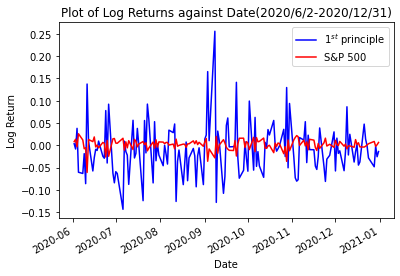

In [269]:
log_return_df.plot(
    'Date',
    'p1',
    label=r'$1^{st}$ principle',
    title='Plot of Log Returns against Date(2020/6/2-2020/12/31)',
    ylabel='Log Return',
    color='blue')
sp500_log_return_df.plot(label='S&P 500', color='red', legend=True)

(4)	Calculate the correlation coefficient between first principal component and daily return of S&P500 index

In [270]:
corr_matrix = np.corrcoef(log_return_df['p1'],sp500_log_return_df)
print('The Pearson Correlation Coefficient is {}'.format(corr_matrix[0,1]))

The Pearson Correlation Coefficient is -0.7452746943474113


This implies that the $1^{st}$ principle of 10 selected stocks' log returns and S&P 500's log returns have strong negative linear relationship.